In [17]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statistics
%matplotlib inline
#read dataset of csv format and label it
X=pd.read_csv('death_rate.csv',names=('A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','B'))
#extract each column and convert it into list
A1 = X['A1']
A1 = list(A1)
A2 = X['A2']
A2 = list(A2)
A3 = X['A3']
A3 = list(A3)
A4 = X['A4']
A4 = list(A4)
B = X['B']
B = list(B)
#find mean of each independend and dependent variables
X1=statistics.mean(A1)
X2=statistics.mean(A2)
X3=statistics.mean(A3)
X4=statistics.mean(A4)
Y1=statistics.mean(B)
#function to find theta_1
def fun1(x,y,z):
    lst1=[]
    lst2=[]
    ls1=[]
    ls2=[]
    for i in range(len(x)):
        a=x[i]-z
        lst1.append(a)
    for i in range(len(x)):
        b=y[i]-Y1
        lst2.append(b)

    q=np.array(lst1)
    r=np.array(lst2)
    h=list(q*r)

    s=list(np.square(lst1))
    O1=sum(h)/sum(s)
    O01=Y1-(O1*z)
    ls1.append(O1)
    ls2.append(O01)
    ls1=ls1+ls2
    return ls1
aa=fun1(A1,B,X1)
bb=fun1(A2,B,X2)
cc=fun1(A3,B,X3)
dd=fun1(A4,B,X4)

O0=(aa[1]+bb[1]+cc[1]+dd[1])/4
x1,x2,x3,x4=map(float,input().split())
value=O0+aa[0]*x1+bb[0]*x2+cc[0]*x3+dd[0]*x4
print(value)

47 45 79 6.5
1236.3853534607242


In [3]:
X.shape

(60, 16)

In [4]:
X.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,B
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,37.366667,34.816667,74.600000,8.798333,3.263167,10.973333,80.913333,3876.050000,11.873333,46.073333,14.373333,37.850000,22.516667,53.766667,57.533333,940.358433
std,9.984678,11.975245,4.766408,1.464552,0.135252,0.845299,5.141373,1454.102361,8.919886,4.626851,4.160096,91.977673,46.358402,63.390468,5.460076,62.206278
min,10.000000,12.000000,63.000000,5.600000,2.920000,9.000000,66.800000,1441.000000,0.800000,33.800000,9.400000,1.000000,1.000000,1.000000,38.000000,790.733000
25%,32.750000,27.000000,72.000000,7.675000,3.210000,10.400000,78.375000,3104.250000,4.950000,43.250000,12.000000,7.000000,4.000000,11.000000,54.750000,898.372000
50%,38.000000,31.500000,74.000000,9.000000,3.265000,11.050000,81.150000,3567.000000,10.400000,45.500000,13.200000,14.500000,9.000000,30.000000,57.000000,943.683000
75%,43.250000,40.000000,77.250000,9.700000,3.360000,11.500000,83.600000,4519.750000,15.650000,49.525000,15.150000,30.250000,23.750000,69.000000,60.000000,983.205750
max,60.000000,83.000000,85.000000,11.800000,3.530000,12.300000,90.700000,9699.000000,38.500000,59.700000,26.400000,648.000000,319.000000,278.000000,73.000000,1113.156000


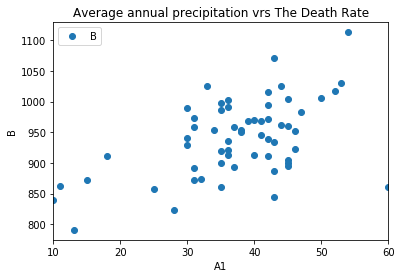

In [5]:
X.plot(x='A1' ,y='B', style='o')
plt.title('Average annual precipitation vrs The Death Rate')
plt.xlabel('A1')
plt.ylabel('B')
plt.show()

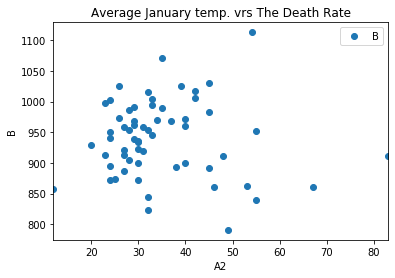

In [6]:
X.plot(x='A2', y='B' ,style='o')
plt.title('Average January temp. vrs The Death Rate')
plt.xlabel('A2')
plt.ylabel('B')
plt.show()

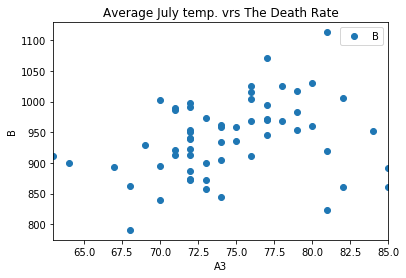

In [7]:
X.plot(x='A3',y='B', style='o')
plt.title('Average July temp. vrs The Death Rate')
plt.xlabel('A3')
plt.ylabel('B')
plt.show()

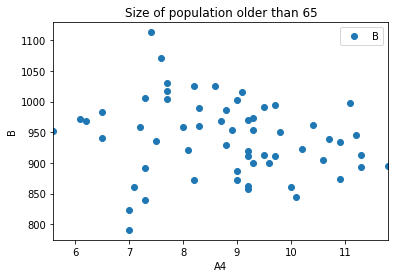

In [14]:
X.plot(x='A4', y='B', style='o')
plt.title('Size of population older than 65')
plt.xlabel('A4')
plt.ylabel('B')
plt.show()

In [8]:
X.isnull().any()

A1     False
A2     False
A3     False
A4     False
A5     False
A6     False
A7     False
A8     False
A9     False
A10    False
A11    False
A12    False
A13    False
A14    False
A15    False
B      False
dtype: bool

In [9]:
x=X[['A1','A2','A3','A4']].values
y=X['B'].values

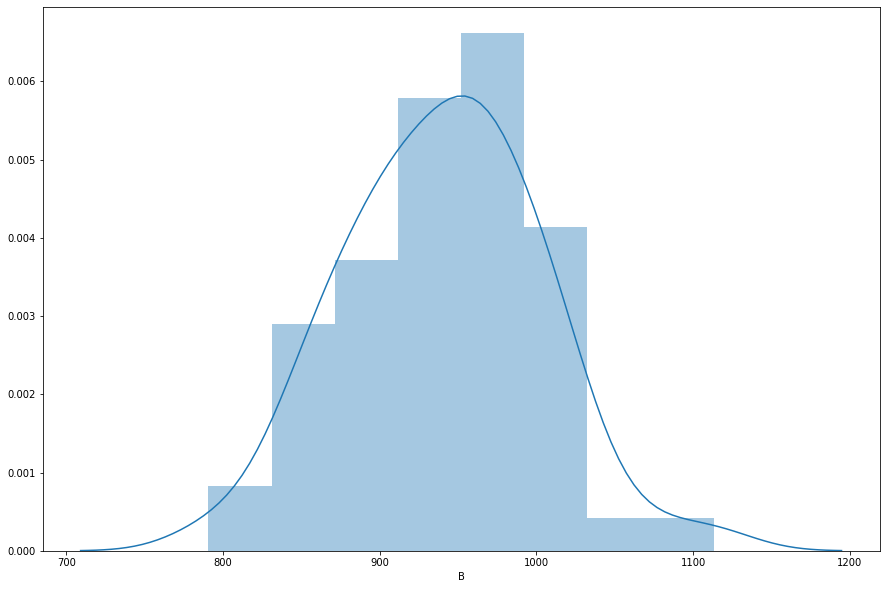

In [13]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(X['B'])

In [19]:
SSE=0
SST=0
for i in range(len(B)):
    SSE=SSE+(B[i]-value)**2
    SST=SST+(B[i]-Y1)**2
    
r2=1-(SSE/SST)
print(r2)

-23.029961481555876


In [43]:
from sklearn.model_selection import train_test_split
p=X.iloc[:,:-12]
q=X['B']
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.2,random_state=0)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(p_train,q_train)
#a=[float(x) for x in input().split()]
#a=[a]
pred=regressor.predict(p_test)
print(pred)

from sklearn.metrics import r2_score
s=r2_score(q_test,pred)
print(s)

[908.70203302 963.5690158  951.21690263 811.62548584 926.88863099
 948.20092842 957.90915704 884.76789747 910.89745118 985.86571824
 972.82673937 997.45032305]
0.3510190572560159
